In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Zomato Restaurants Dataset export 2025-07-07 23-36-25.csv")

In [3]:
print(df.shape)    
print(df.columns)

(7105, 12)
Index(['Unnamed: 0', 'restaurant name', 'restaurant type', 'rate (out of 5)',
       'num of ratings', 'avg cost (two people)', 'online_order',
       'table booking', 'cuisines type', 'Unnamed: 9', 'area',
       'local address'],
      dtype='object')


In [4]:
df.head()

,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,Unnamed: 9,area,local address
0,0,#FeelTheROLL,Quick Bites,3.4,7,200,No,No,Fast Food,0,Bellandur,Bellandur
1,1,#L-81 Cafe,Quick Bites,3.9,48,400,Yes,No,"Fast Food, Beverages",1,"Byresandra,Tavarekere,Madiwala",HSR
2,2,#refuel,Cafe,3.7,37,400,Yes,No,"Cafe, Beverages",2,Bannerghatta Road,Bannerghatta Road
3,3,@ Biryani Central,Casual Dining,2.7,135,550,Yes,No,"Biryani, Mughlai, Chinese",3,Marathahalli,Marathahalli
4,4,@ The Bbq,Casual Dining,2.8,40,700,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",4,Bellandur,Bellandur


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7105 non-null   int64  
 1   restaurant name        7105 non-null   object 
 2   restaurant type        7105 non-null   object 
 3   rate (out of 5)        7105 non-null   float64
 4   num of ratings         7105 non-null   int64  
 5   avg cost (two people)  7105 non-null   int64  
 6   online_order           7105 non-null   object 
 7   table booking          7105 non-null   object 
 8   cuisines type          7105 non-null   object 
 9   Unnamed: 9             7105 non-null   int64  
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(1), int64(4), object(7)
memory usage: 666.2+ KB


In [6]:
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
print(missing_percent)
print("Missing Value Percentages:\n", missing_percent[missing_percent > 0])

Unnamed: 0               0.0
restaurant name          0.0
restaurant type          0.0
rate (out of 5)          0.0
num of ratings           0.0
avg cost (two people)    0.0
online_order             0.0
table booking            0.0
cuisines type            0.0
Unnamed: 9               0.0
area                     0.0
local address            0.0
dtype: float64
Missing Value Percentages:
 Series([], dtype: float64)


In [7]:
df = df.drop_duplicates()

In [8]:
df = df.drop(columns=['Unnamed: 9'])
df.rename(columns={'Unnamed: 0': 'other'}, inplace=True)

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [10]:
df['restaurant_name'] = df['restaurant_name'].map(str).str.replace('[^a-zA-Z ]', '', regex=True)

In [11]:
df.head()

,other,restaurant_name,restaurant_type,rate_(out_of_5),num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,FeelTheROLL,Quick Bites,3.4,7,200,No,No,Fast Food,Bellandur,Bellandur
1,1,L Cafe,Quick Bites,3.9,48,400,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,refuel,Cafe,3.7,37,400,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,Biryani Central,Casual Dining,2.7,135,550,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,The Bbq,Casual Dining,2.8,40,700,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [12]:
df.rename(columns={'other': 'Sl.no'}, inplace=True)

In [13]:
df.head()

,Sl.no,restaurant_name,restaurant_type,rate_(out_of_5),num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,FeelTheROLL,Quick Bites,3.4,7,200,No,No,Fast Food,Bellandur,Bellandur
1,1,L Cafe,Quick Bites,3.9,48,400,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,refuel,Cafe,3.7,37,400,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,Biryani Central,Casual Dining,2.7,135,550,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,The Bbq,Casual Dining,2.8,40,700,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


In [14]:
df['rate_(out_of_5)'] = pd.to_numeric(df['rate_(out_of_5)'], errors='coerce')
df['avg_cost_(two_people)'] = df['avg_cost_(two_people)'].replace(',', '', regex=True).map(float)

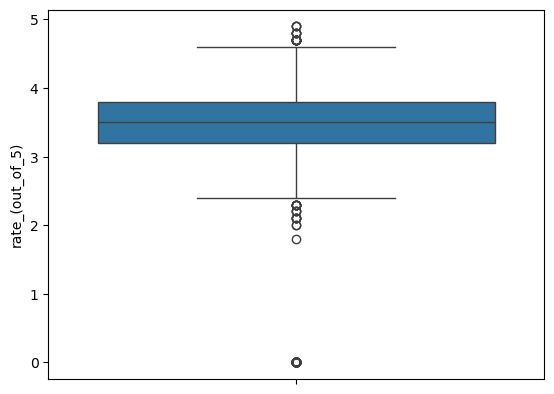

In [15]:
sns.boxplot(df['rate_(out_of_5)'])

df = df[df['rate_(out_of_5)'] <= df['rate_(out_of_5)'].quantile(0.99)]

In [16]:
df = df[df['rate_(out_of_5)'] >= df['rate_(out_of_5)'].quantile(0.01)]

In [17]:
df.head()

,Sl.no,restaurant_name,restaurant_type,rate_(out_of_5),num_of_ratings,avg_cost_(two_people),online_order,table_booking,cuisines_type,area,local_address
0,0,FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,L Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
